In [1]:
if(!require(psych)) {install.packages("psych")}
if(!require(FSA)) {install.packages("FSA")}
if(!require(ggplot2)) {install.packages("ggplot2")}
if(!require(car)) {install.packages("car")}
if(!require(multcompView)) {install.packages("multcompView")}
if(!require(lsmeans)) {install.packages("lsmeans")}
if(!require(rcompanion)) {install.packages("rcompanion")}
if(!require(phia)) {install.packages("phia")}


Loading required package: psych

Loading required package: FSA

## FSA v0.9.4. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: 'FSA'


The following object is masked from 'package:psych':

    headtail


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: car

Loading required package: carData

Registered S3 methods overwritten by 'car':
  method       from
  hist.boot    FSA 
  confint.boot FSA 


Attaching package: 'car'


The following object is masked from 'package:FSA':

    bootCase


The following object is masked from 'package:psych':

    logit


Loading required package: multcompView

Loading required package: lsmeans

Loading required package: emmeans

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help

In [2]:
Data <- read.csv("data.csv")
Data$OS = factor(Data$OS, levels = unique(Data$OS))
Data$Scene = factor(Data$Scene, levels = unique(Data$Scene))
Data$Algorithm = factor(Data$Algorithm, levels = unique(Data$Algorithm))

os_order <- c("macOS", "WSL", "LinuxVM", "Windows","LinuxHW")
Data$OS <- factor(Data$OS, levels = os_order)

In [3]:
library(psych)
headTail(Data)
str(Data)
summary(Data)

,OS,Scene,Algorithm,Time
,<fct>,<fct>,<fct>,<chr>
1,Windows,coffee-splash,bvh,1947.9
2,Windows,coffee-splash,kdtree,2378.2
3,Windows,coffee-splash,mitchell,1998
4,Windows,coffee-splash,sinc,2012.2
...,NA,NA,NA,...
397,LinuxHW,sssdragon,bvh,2497.8
398,LinuxHW,sssdragon,kdtree,4783
399,LinuxHW,sssdragon,mitchell,2532.7
400,LinuxHW,sssdragon,sinc,2602.8


'data.frame':	400 obs. of  4 variables:
 $ OS       : Factor w/ 5 levels "macOS","WSL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Scene    : Factor w/ 4 levels "coffee-splash",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Algorithm: Factor w/ 4 levels "bvh","kdtree",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Time     : num  1948 2378 1998 2012 739 ...


       OS               Scene        Algorithm        Time       
 macOS  :80   coffee-splash:100   bvh     :100   Min.   : 529.4  
 WSL    :80   ganesha      :100   kdtree  :100   1st Qu.:1150.4  
 LinuxVM:80   pbrt-book    :100   mitchell:100   Median :1805.8  
 Windows:80   sssdragon    :100   sinc    :100   Mean   :1764.3  
 LinuxHW:80                                      3rd Qu.:2150.4  
                                                 Max.   :5208.3  

In [4]:
Summarize(Time ~ OS, data=Data, digits = 3)

OS,n,mean,sd,min,Q1,median,Q3,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
macOS,80,1354.322,599.460,529.4,1051.275,1482.75,1610.100,3071.5
WSL,80,1552.151,676.230,611.1,1225.075,1734.65,1838.125,3456.8
LinuxVM,80,1786.723,792.593,683.6,1402.625,1984.30,2120.025,4065.6
Windows,80,1984.138,857.371,739.2,1710.125,2038.60,2341.125,4702.0
LinuxHW,80,2144.289,950.722,822.7,1551.625,2392.75,2516.475,5208.3


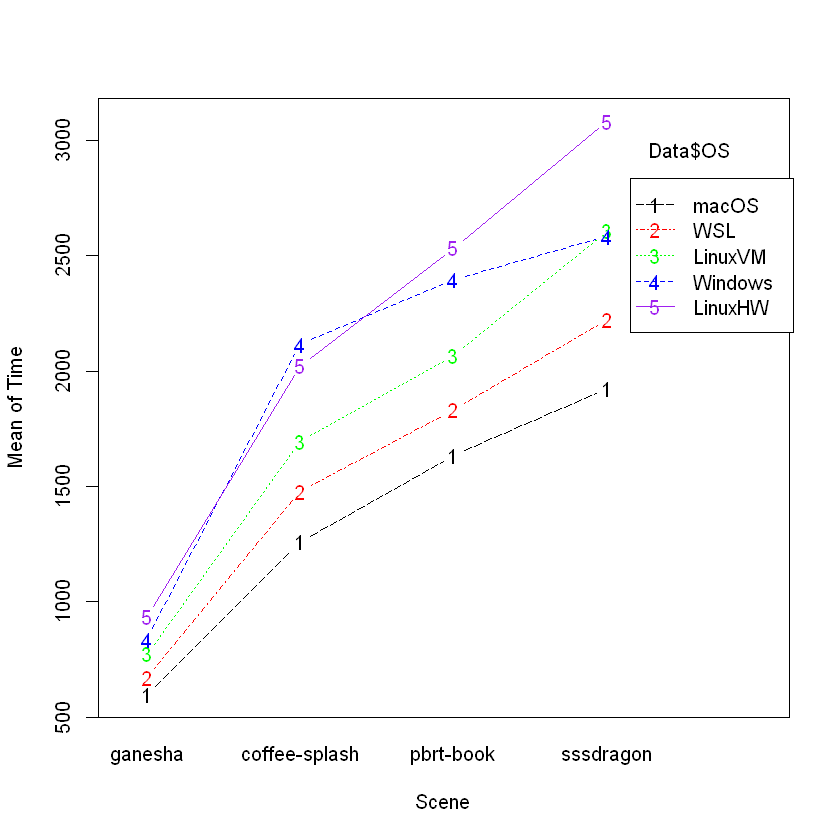

In [5]:
scene_order <- c("ganesha", "coffee-splash", "pbrt-book", "sssdragon")
Data$Scene <- factor(Data$Scene, levels = scene_order)
interaction.plot(x.factor      = Data$Scene,
                 trace.factor  = Data$OS,
                 response      = Data$Time,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green","blue","purple"),
                 fixed = TRUE,
                 leg.bty = "o",
                 xlab = "Scene",
                 ylab = "Mean of Time")


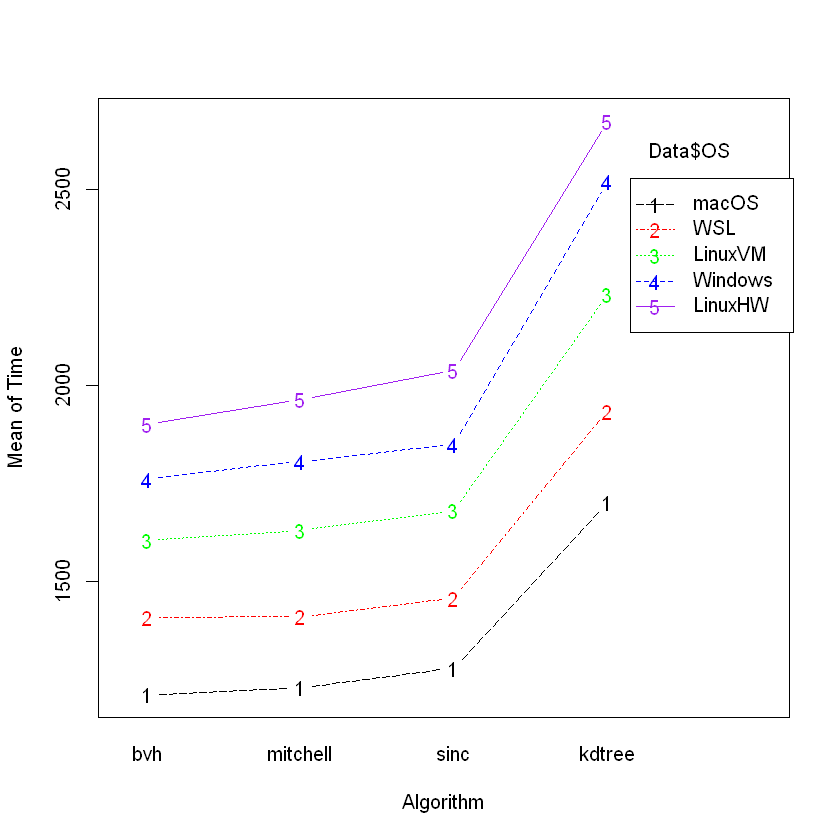

In [6]:
algorithm_order <- c("bvh", "mitchell", "sinc", "kdtree")
Data$Algorithm <- factor(Data$Algorithm, levels = algorithm_order)
interaction.plot(x.factor     = Data$Algorithm,
                 trace.factor = Data$OS,
                 response     = Data$Time,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green","blue","purple"),
                 fixed = TRUE,
                 leg.bty = "o",
                 xlab = "Algorithm",
                 ylab = "Mean of Time")

In [7]:
# MODELO LINEAL Y ANOVA
model = lm(Time ~ OS*Scene*Algorithm, data=Data)
### Anova ###
library(car)
Anova(model, type="II")
#df2 = n - G = 400 - (5*4*4)

Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OS,32504910.8,4,2040.07500,2.940549e-226
Scene,163229205.5,3,13659.46719,0.000000e+00
Algorithm,27102448.3,3,2268.00714,3.416460e-215
OS:Scene,5902225.3,12,123.47860,2.972550e-112
OS:Algorithm,823011.8,12,17.21797,2.270928e-28
Scene:Algorithm,43800758.8,9,1221.78917,7.230082e-242
OS:Scene:Algorithm,1487965.8,36,10.37642,1.106256e-35
Residuals,1274655.5,320,NA,NA


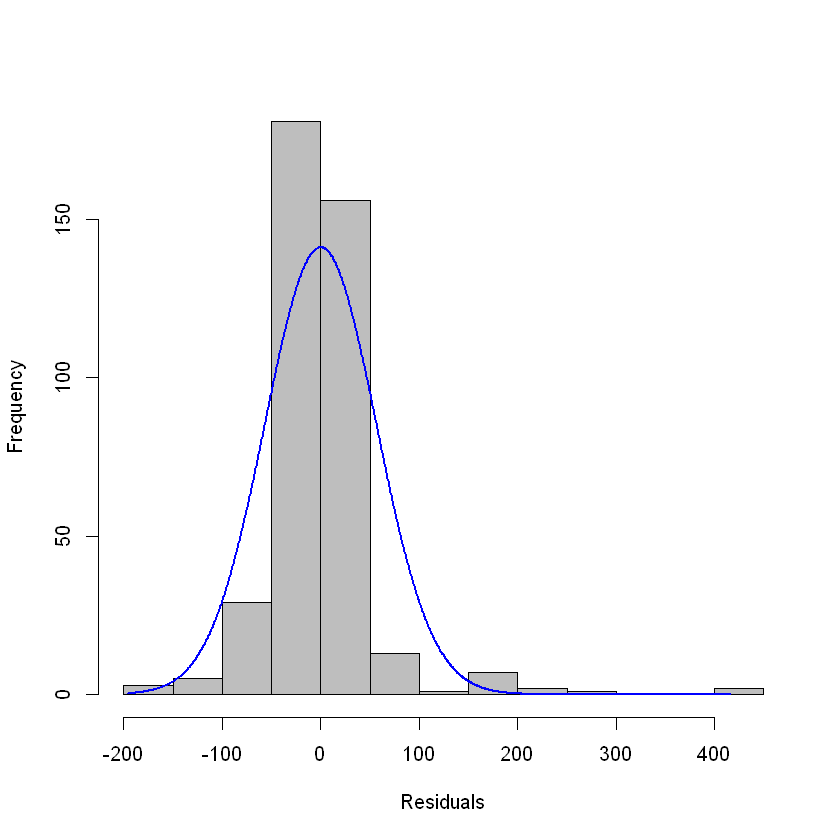

In [8]:
# Evaluacion de supuestos
# Histograma de residuos
x = residuals(model)
library(rcompanion)
plotNormalHistogram(x,
                   xlab = "Residuals")

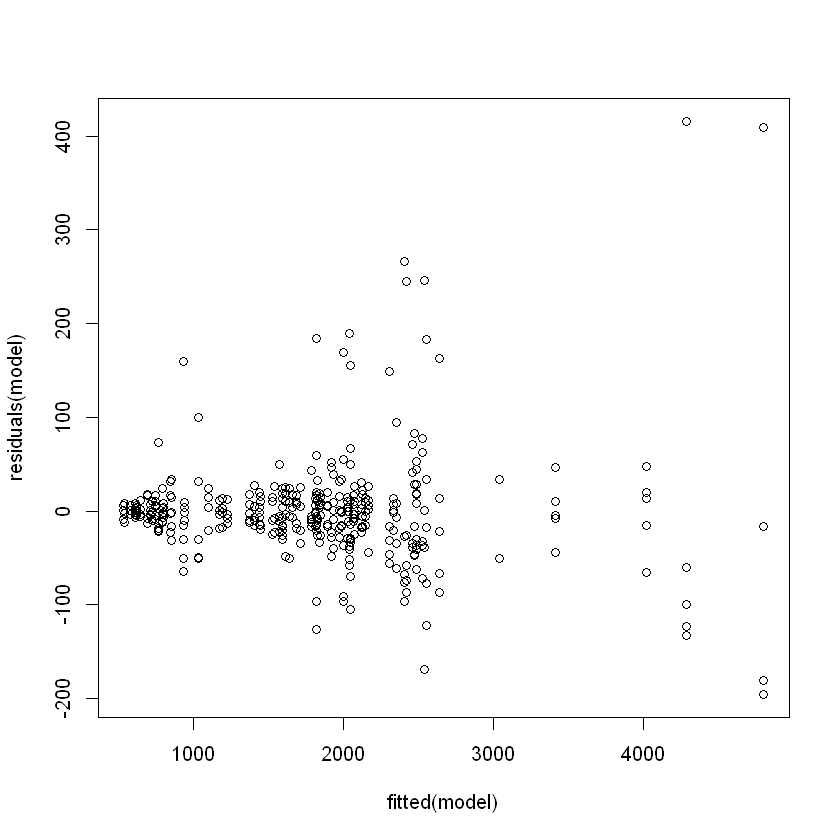

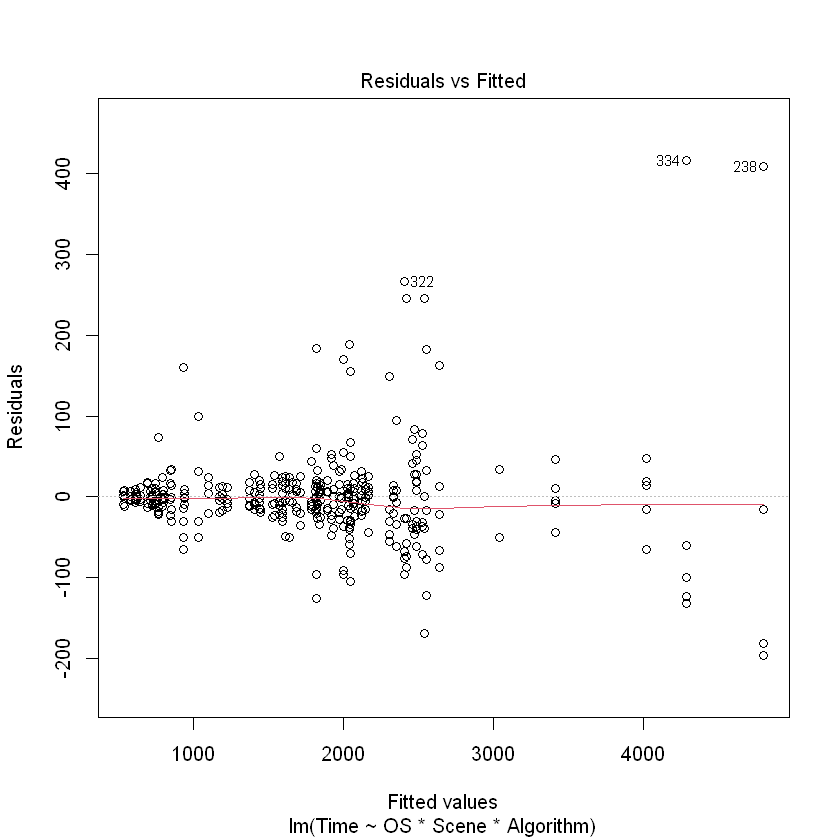

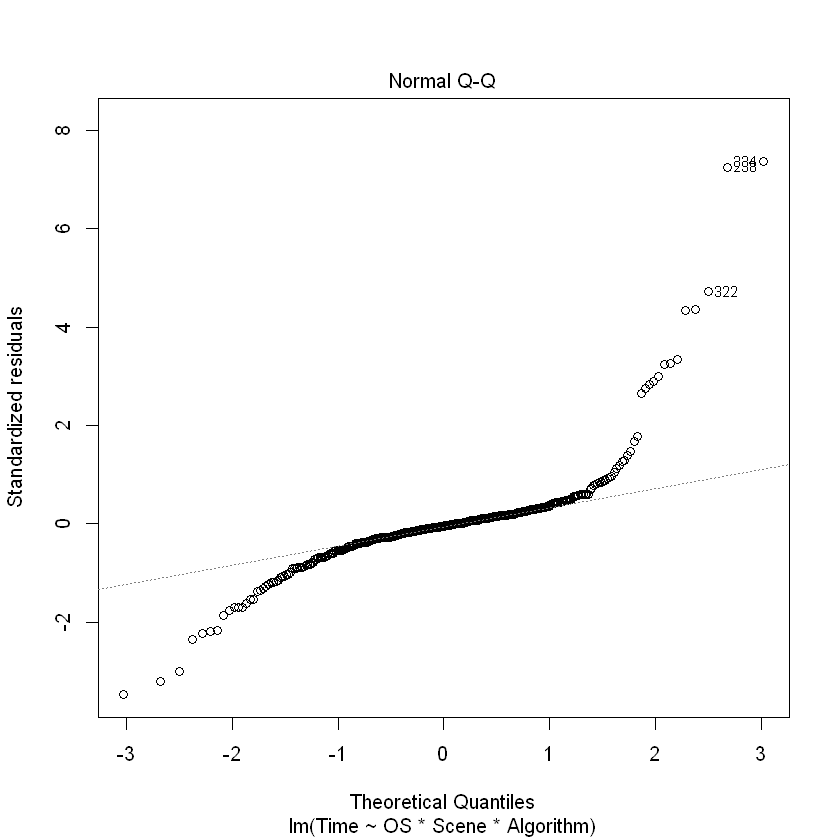

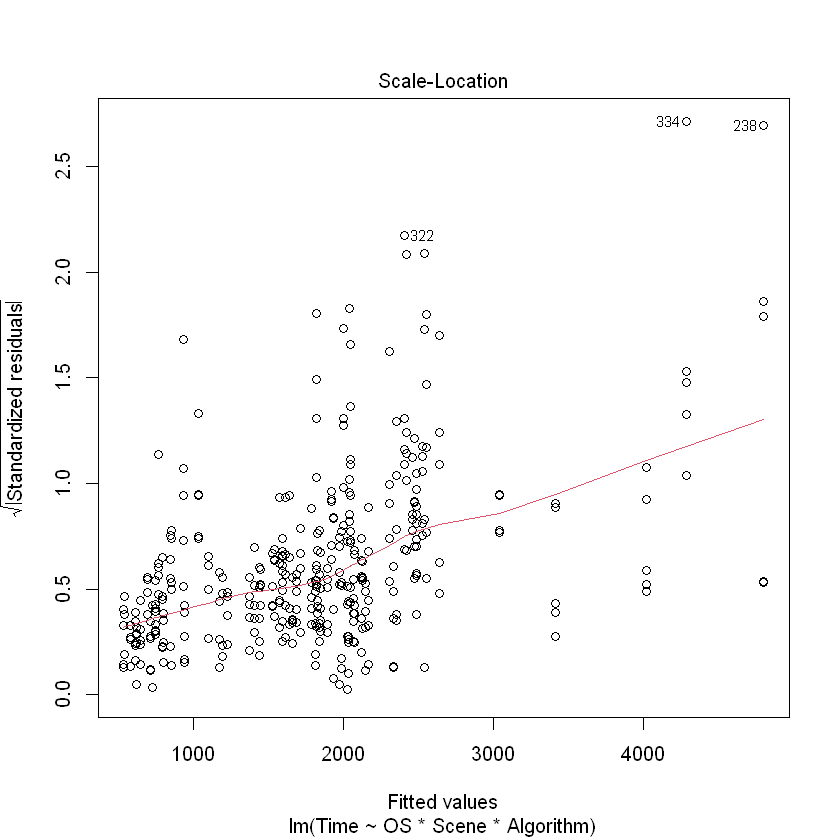

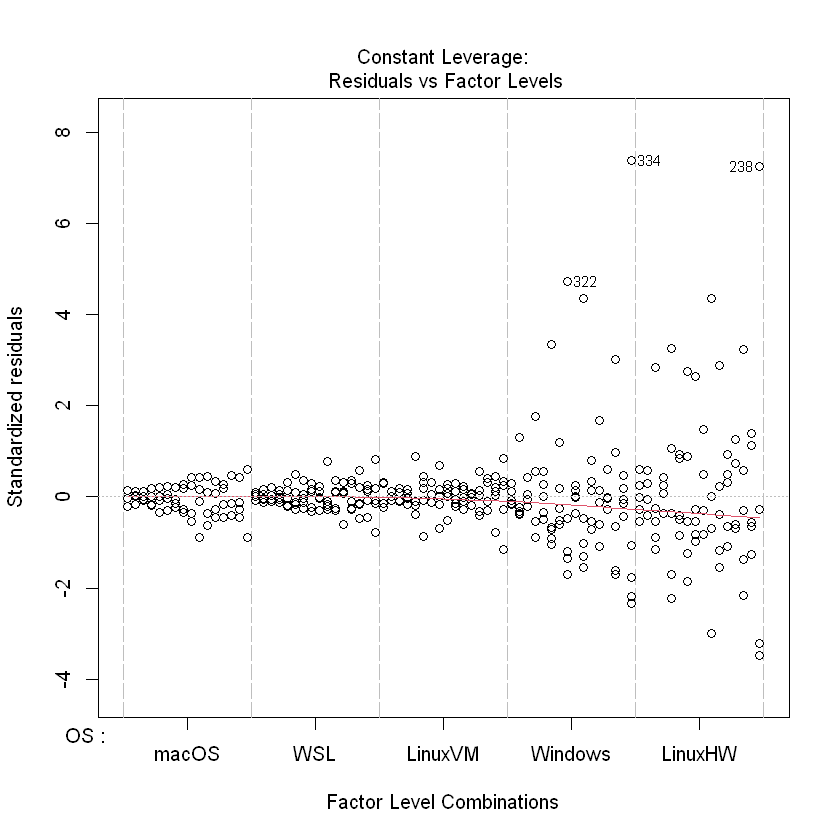

In [9]:
# Homocedasticidad
plot(fitted(model), residuals(model))
plot(model)

In [10]:
# Análisis Post Hoc:
# Prueba Levene
leveneTest(Time ~ OS*Scene*Algorithm, data=Data)
# Post Hoc
library(lsmeans)
marginal = lsmeans(model, pairwise ~ OS, adjust="tukey")

library(multcomp)
# Compact display comparisons
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Scene, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Algorithm, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.650606,0.001393755
,320,NA,NA


NOTE: Results may be misleading due to involvement in interactions

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser


Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,OS,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,macOS,1354.323,7.05629,320,1336.088,1372.557,a
2,WSL,1552.151,7.05629,320,1533.917,1570.385,b
3,LinuxVM,1786.722,7.05629,320,1768.488,1804.957,c
4,Windows,1984.138,7.05629,320,1965.903,2002.372,d
5,LinuxHW,2144.289,7.05629,320,2126.055,2162.523,e


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Scene,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ganesha,763.428,6.311338,320,747.618,779.238,a
2,coffee-splash,1714.984,6.311338,320,1699.174,1730.794,b
3,pbrt-book,2093.784,6.311338,320,2077.974,2109.594,c
4,sssdragon,2485.102,6.311338,320,2469.292,2500.912,d


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Algorithm,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,bvh,1577.179,6.311338,320,1561.369,1592.989,a
2,mitchell,1607.421,6.311338,320,1591.611,1623.231,b
3,sinc,1660.489,6.311338,320,1644.679,1676.299,c
4,kdtree,2212.209,6.311338,320,2196.399,2228.019,d


Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OS,4467.25080,4,2873.811782,2.679930e-249
Scene,26914.72106,3,23085.889118,0.000000e+00
Algorithm,2903.85711,3,2490.760465,2.014369e-221
OS:Scene,419.14176,12,89.878883,8.653337e-95
OS:Algorithm,32.88954,12,7.052687,2.143565e-11
Scene:Algorithm,3514.47815,9,1004.838613,1.025612e-228
OS:Scene:Algorithm,57.44727,36,4.106245,3.429520e-12
Residuals,124.35751,320,NA,NA


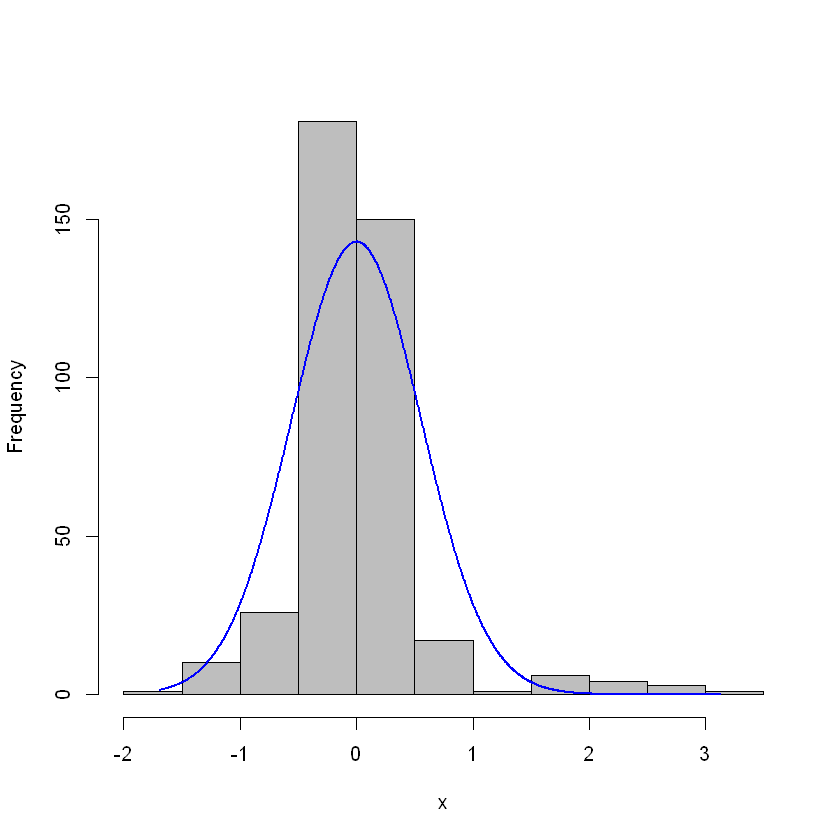

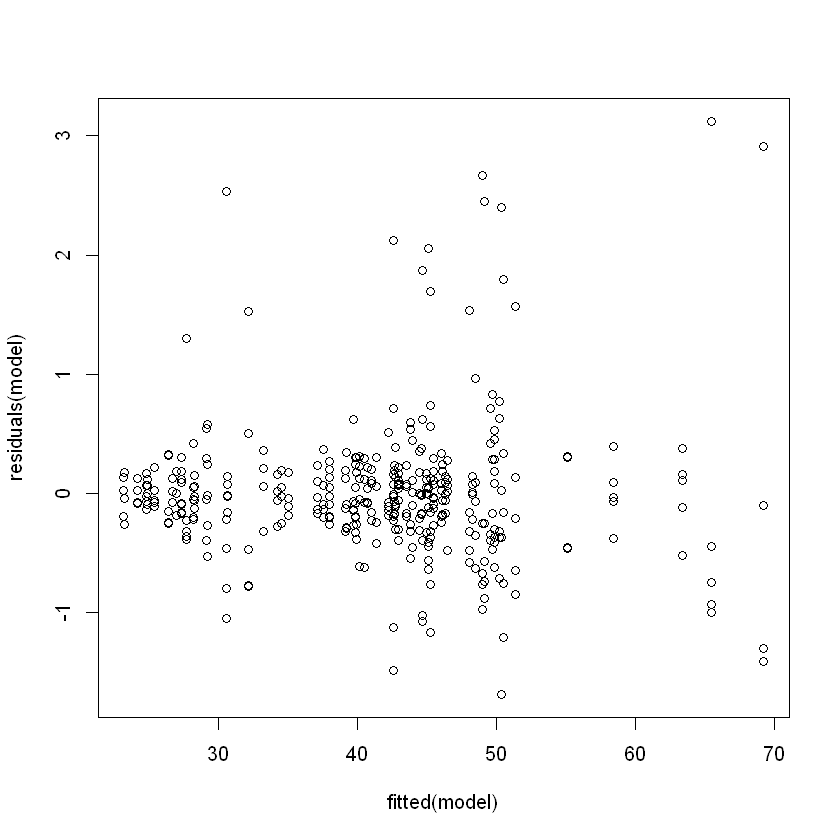

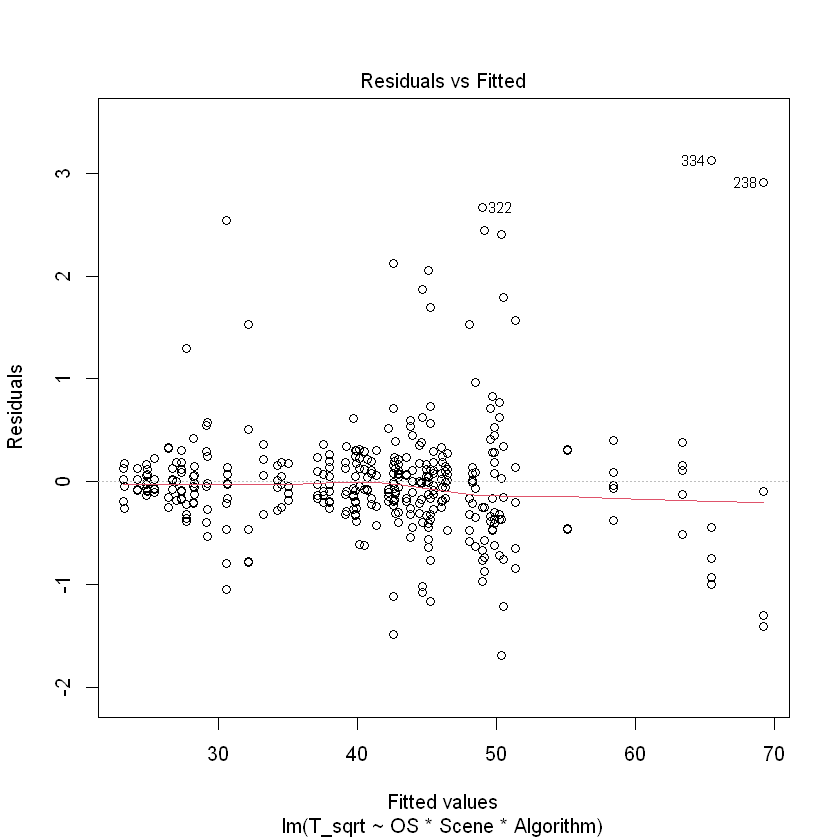

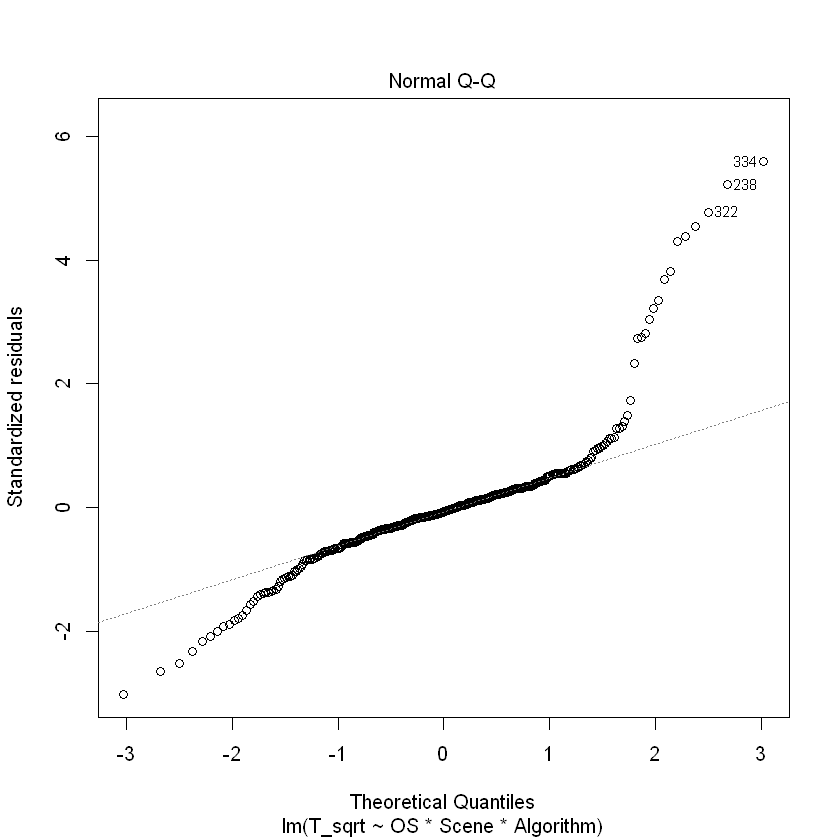

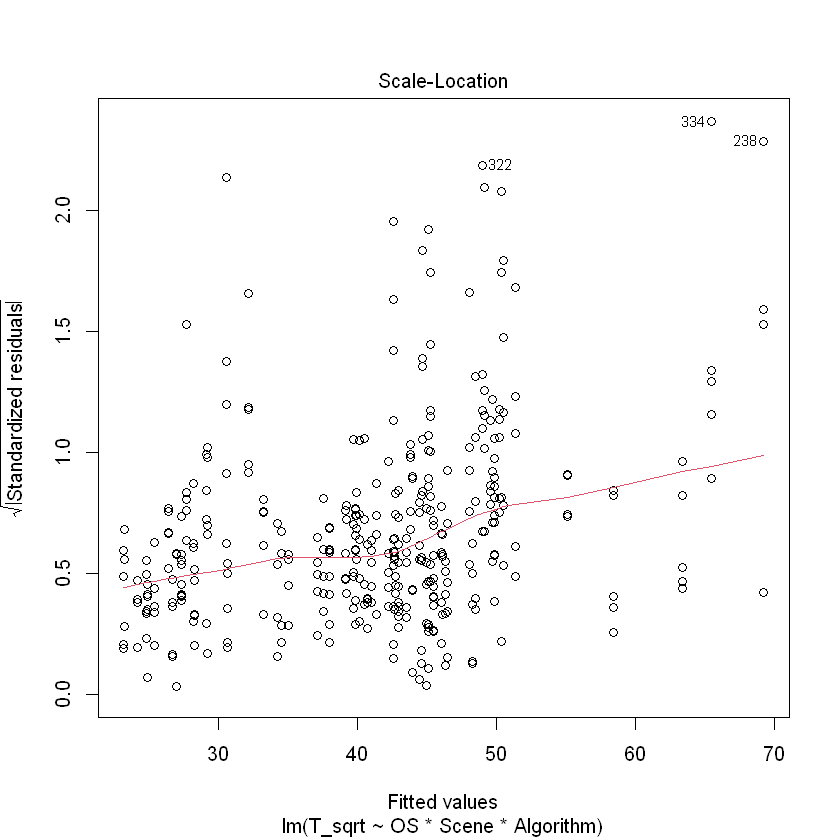

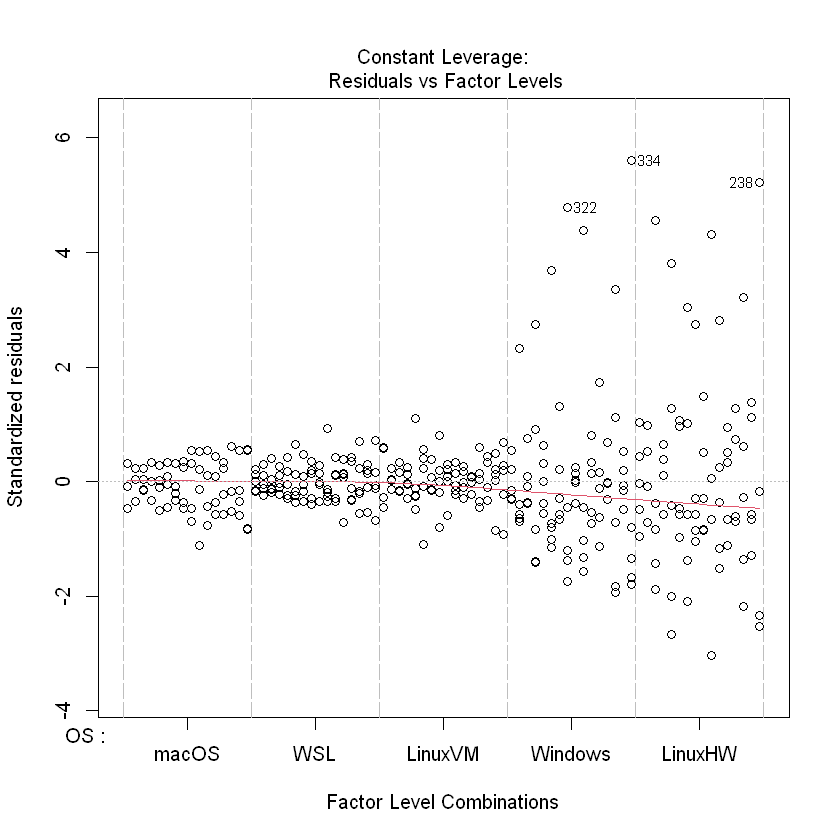

In [11]:
# Transformacion de datos 1
library(rcompanion)
T_sqrt = sqrt(Data$Time)
model = lm(T_sqrt ~ OS*Scene*Algorithm, data=Data)
### Anova ###
library(car)
Anova(model, type="II")
# Histograma de residuos
x = residuals(model)
library(rcompanion)
plotNormalHistogram(x)
plot(fitted(model), residuals(model))
plot(model)

In [12]:
# Análisis Post Hoc:
# Prueba Levene
leveneTest(T_sqrt ~ OS*Scene*Algorithm, data=Data)
# Post Hoc
library(lsmeans)
marginal = lsmeans(model, pairwise ~ OS, adjust="tukey")

library(multcomp)
# Compact display comparisons
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Scene, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Algorithm, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.464456,0.01189868
,320,NA,NA


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,OS,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,macOS,35.90875,0.06969731,320,35.72865,36.08886,a
2,WSL,38.44696,0.06969731,320,38.26686,38.62707,b
3,LinuxVM,41.23198,0.06969731,320,41.05187,41.41208,c
4,Windows,43.45815,0.06969731,320,43.27804,43.63825,d
5,LinuxHW,45.17458,0.06969731,320,44.99447,45.35468,e


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Scene,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ganesha,27.49191,0.06233917,320,27.33575,27.64807,a
2,coffee-splash,41.18516,0.06233917,320,41.02900,41.34132,b
3,pbrt-book,45.60232,0.06233917,320,45.44615,45.75848,c
4,sssdragon,49.09694,0.06233917,320,48.94078,49.25310,d


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Algorithm,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,bvh,38.84463,0.06233917,320,38.68847,39.00079,a
2,mitchell,39.18885,0.06233917,320,39.03269,39.34501,b
3,sinc,39.87656,0.06233917,320,39.72040,40.03272,c
4,kdtree,45.46630,0.06233917,320,45.31014,45.62246,d


Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OS,166.370140,4,3133.614661,3.726803e-255
Scene,1066.661222,3,26787.701576,0.000000e+00
Algorithm,100.067265,3,2513.049115,5.134392e-222
OS:Scene,11.987891,12,75.264770,1.424233e-85
OS:Algorithm,0.769539,12,4.831473,2.619787e-07
Scene:Algorithm,107.387288,9,898.960406,2.902059e-221
OS:Scene:Algorithm,1.441311,36,3.016376,1.090356e-07
Residuals,4.247367,320,NA,NA


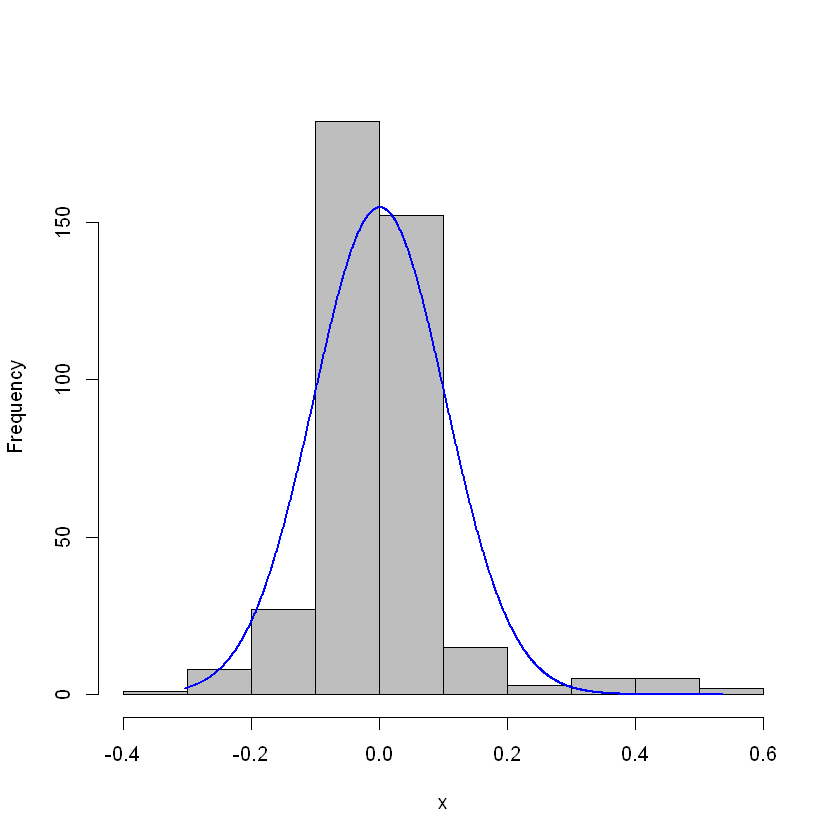

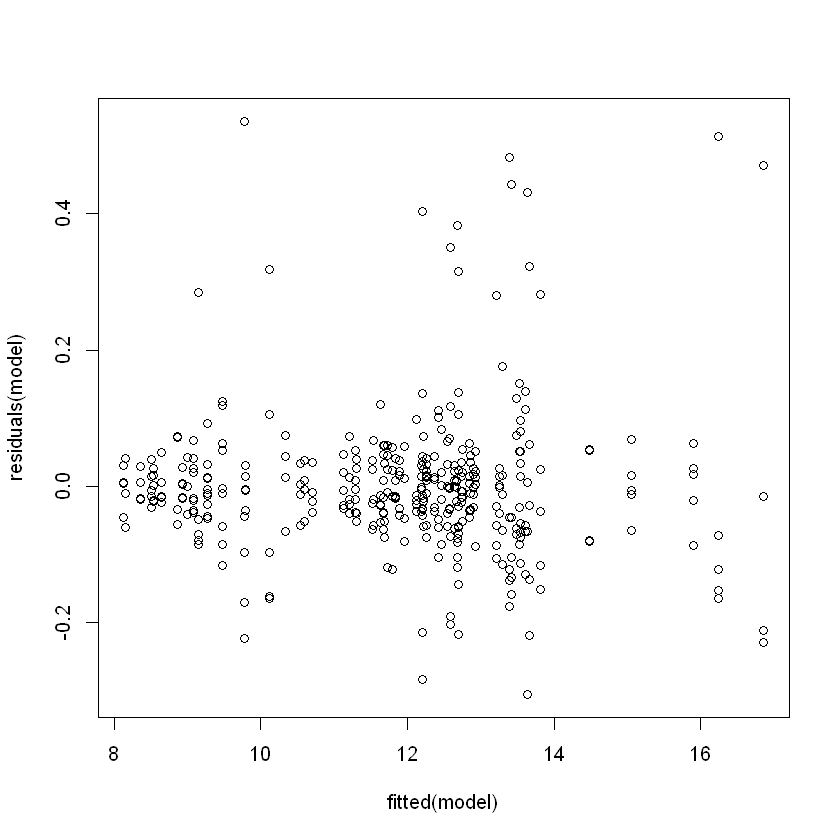

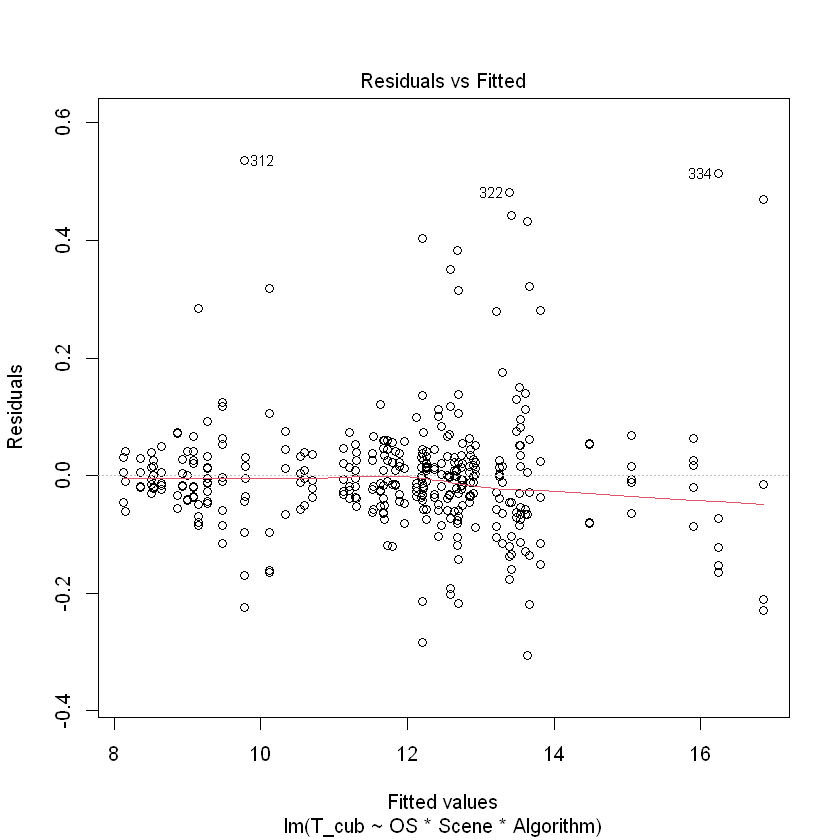

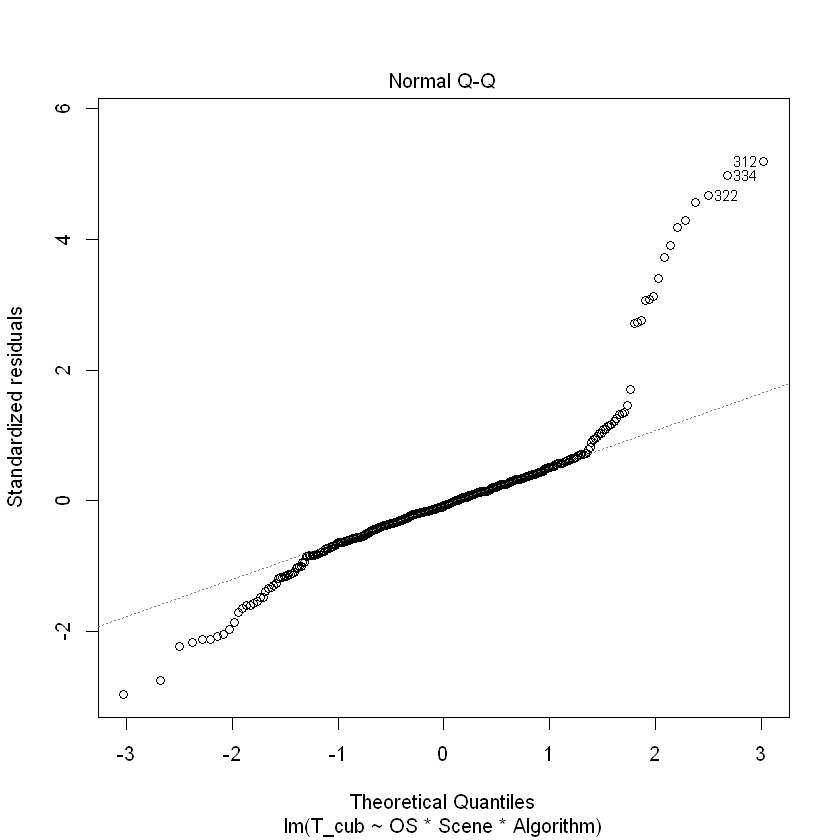

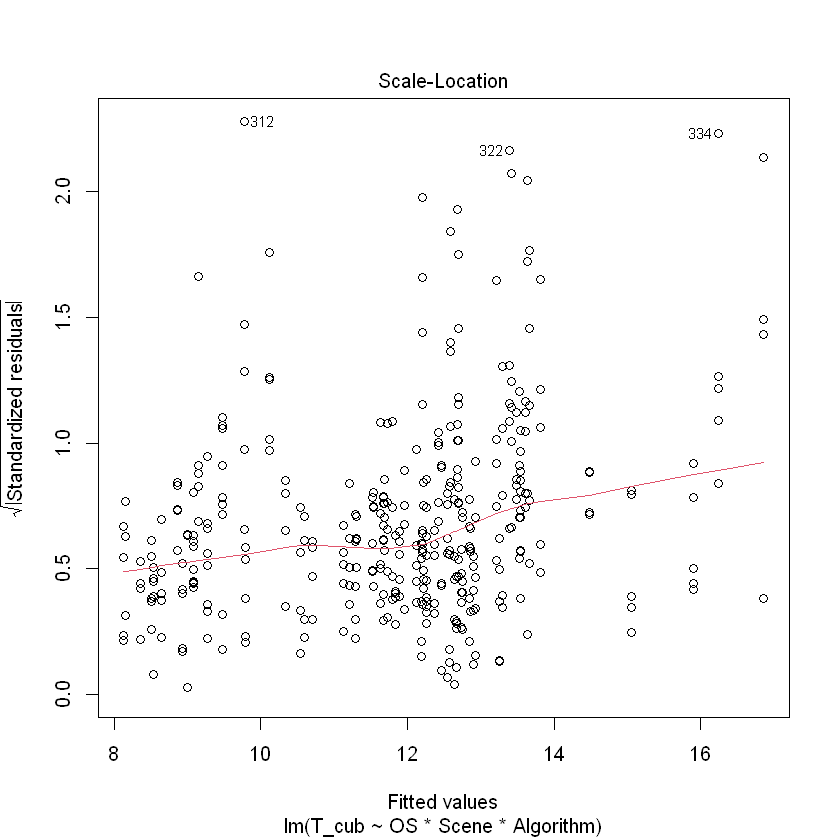

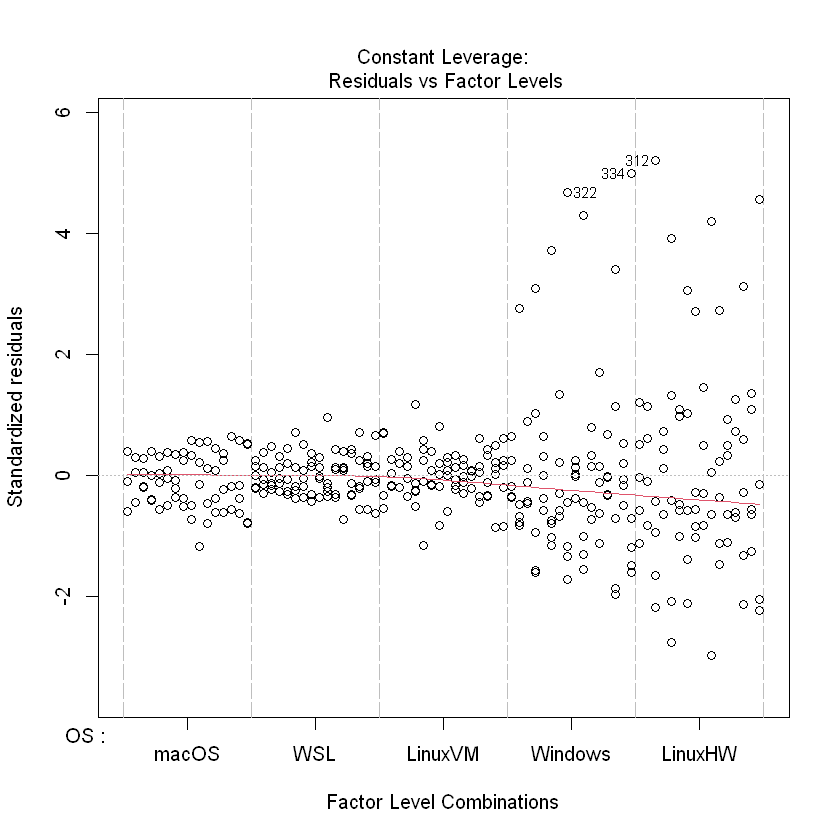

In [13]:
# Transformacion de datos 2
library(rcompanion)
T_cub = sign(Data$Time) * abs(Data$Time) ^(1/3)
model = lm(T_cub ~ OS*Scene*Algorithm, data=Data)
### Anova ###
library(car)
Anova(model, type="II")
# Histograma de residuos
x = residuals(model)
library(rcompanion)
plotNormalHistogram(x)
plot(fitted(model), residuals(model))
plot(model)


In [14]:
# Análisis Post Hoc:
# Prueba Levene
leveneTest(T_cub ~ OS*Scene*Algorithm, data=Data)
# Post Hoc
library(lsmeans)
marginal = lsmeans(model, pairwise ~ OS, adjust="tukey")

library(multcomp)
# Compact display comparisons
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Scene, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD
marginal = lsmeans(model, pairwise ~ Algorithm, adjust="tukey")

CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.418399,0.01932089
,320,NA,NA


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,OS,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,macOS,10.82192,0.01288071,320,10.78864,10.85521,a
2,WSL,11.32572,0.01288071,320,11.29244,11.35901,b
3,LinuxVM,11.86542,0.01288071,320,11.83214,11.89871,c
4,Windows,12.28792,0.01288071,320,12.25463,12.32120,d
5,LinuxHW,12.61072,0.01288071,320,12.57744,12.64401,e


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Scene,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ganesha,9.098885,0.01152086,320,9.070025,9.127745,a
2,coffee-splash,11.911281,0.01152086,320,11.882421,11.940141,b
3,pbrt-book,12.754411,0.01152086,320,12.725552,12.783271,c
4,sssdragon,13.364786,0.01152086,320,13.335926,13.393645,d


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Algorithm,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,bvh,11.40733,0.01152086,320,11.37847,11.43619,a
2,mitchell,11.47271,0.01152086,320,11.44385,11.50157,b
3,sinc,11.60997,0.01152086,320,11.58111,11.63883,c
4,kdtree,12.63935,0.01152086,320,12.61049,12.66821,d


Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted"
Warning message in printHypothesis(L, rhs, names(b)):
"one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OS,10.90649007,4,3553.706178,1.085543e-263
Scene,78.89118602,3,34273.916226,0.000000e+00
Algorithm,5.68588905,3,2470.208584,7.178965e-221
OS:Scene,0.51999930,12,56.477831,1.348739e-71
OS:Algorithm,0.02710127,12,2.943506,6.691176e-04
Scene:Algorithm,4.67060244,9,676.373982,2.227764e-202
OS:Scene:Algorithm,0.05868623,36,2.124664,3.285938e-04
Residuals,0.24552373,320,NA,NA


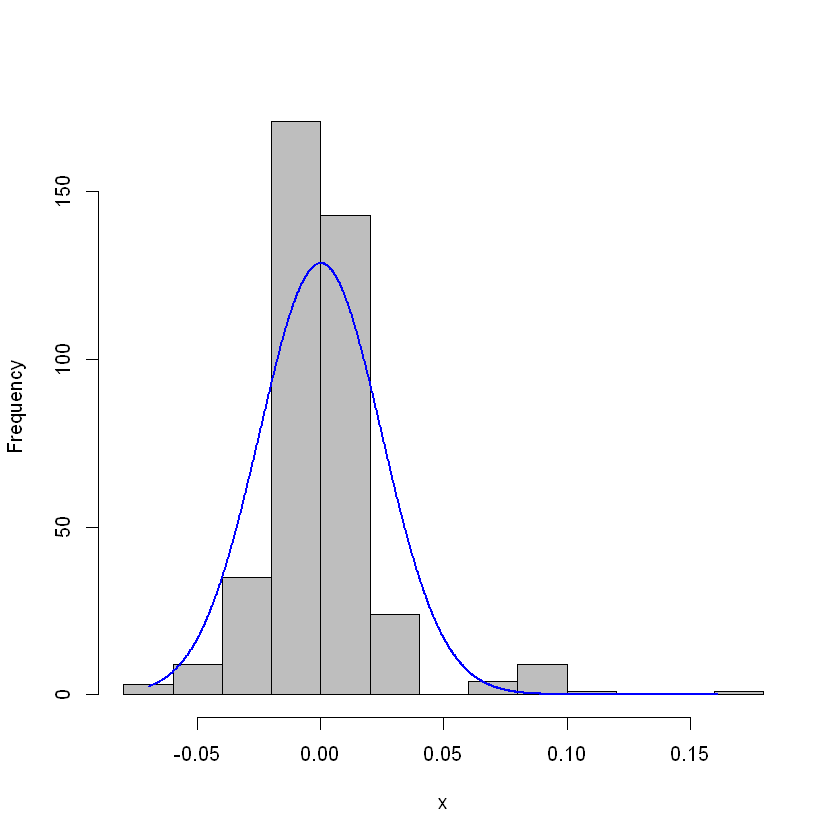

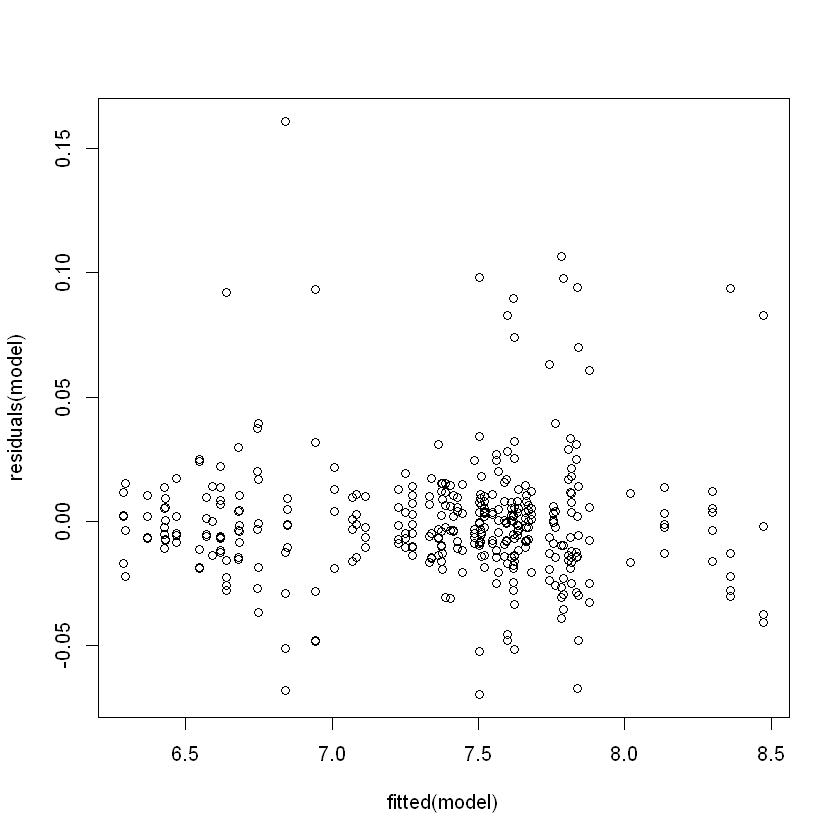

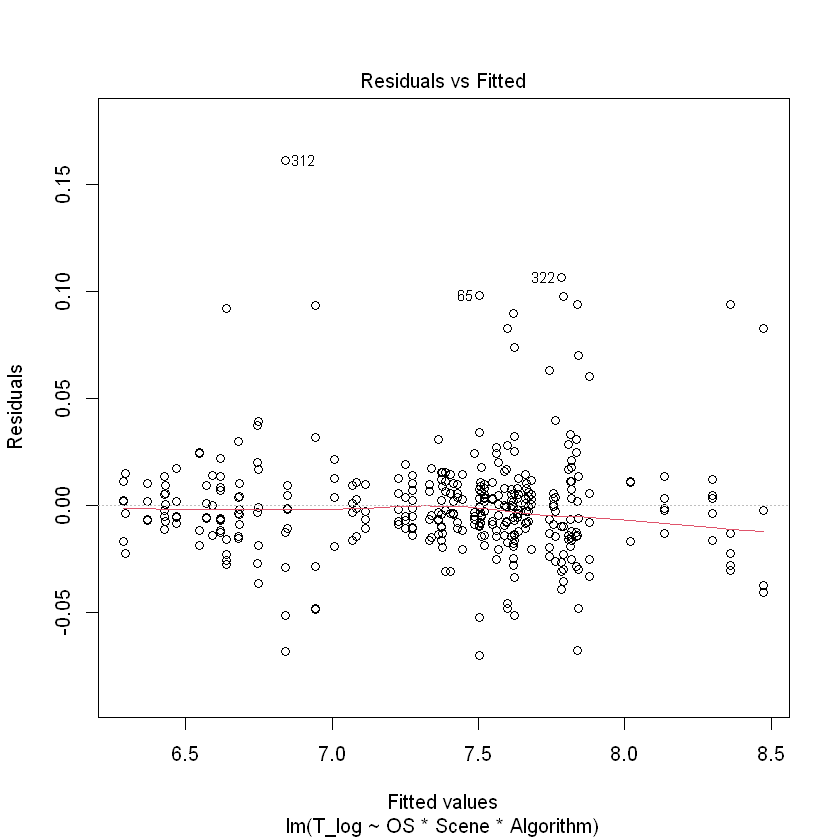

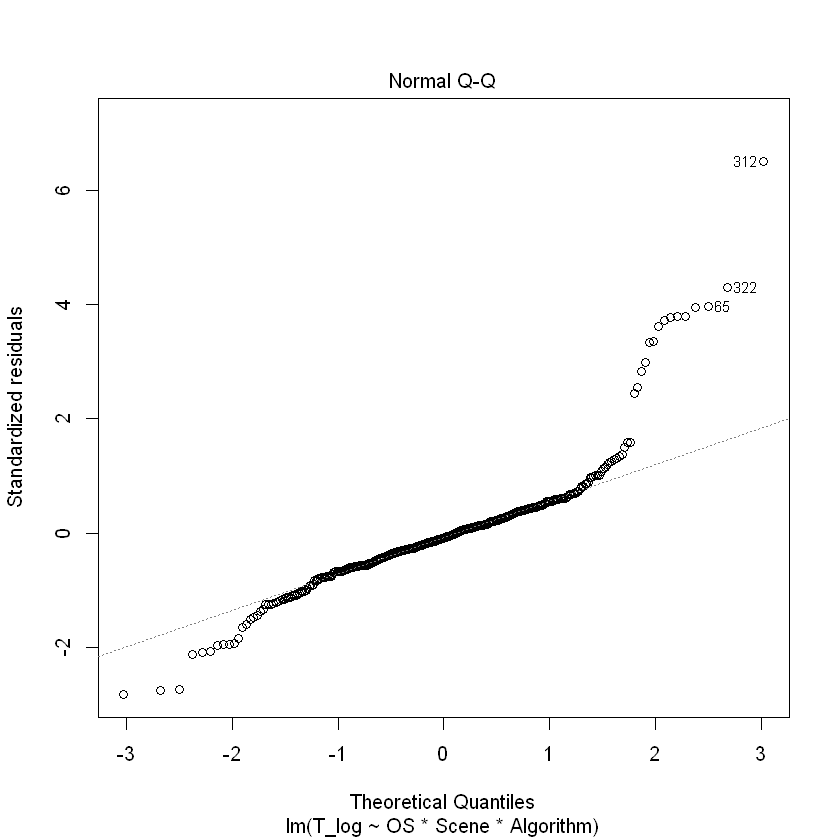

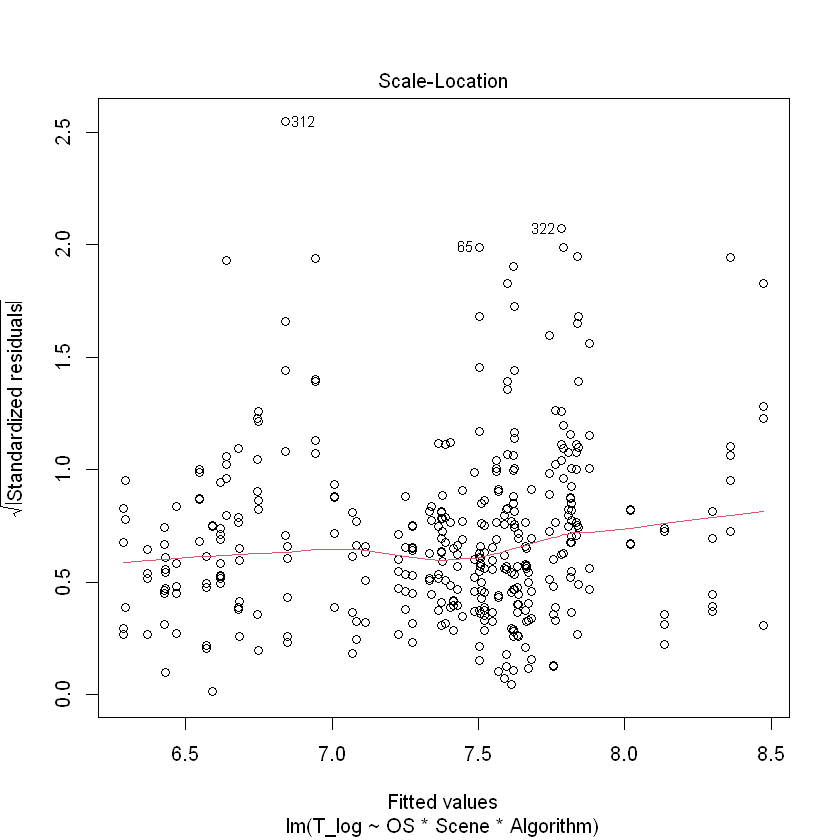

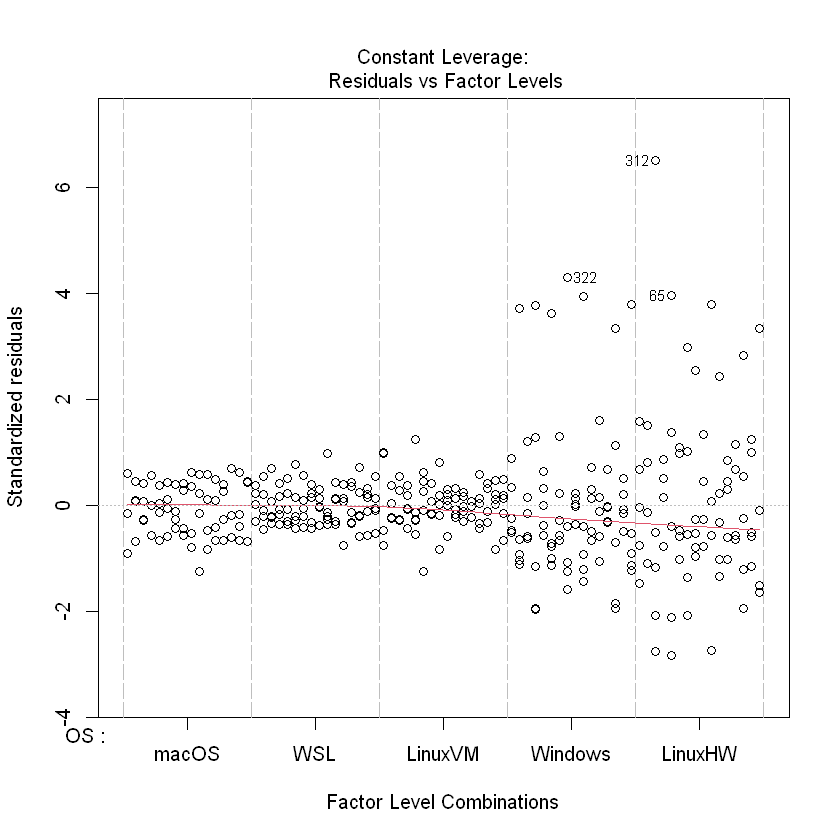

In [15]:
# Transformacion de datos 3
library(rcompanion)
T_log = log(Data$Time)
model = lm(T_log ~ OS*Scene*Algorithm, data=Data)
#### Anova ###
library(car)
Anova(model, type="II")
# Histograma de residuos
x = residuals(model)
library(rcompanion)
plotNormalHistogram(x)
plot(fitted(model), residuals(model))
plot(model)

In [16]:
# Análisis Post Hoc:
# Prueba Levene
leveneTest(T_log ~ OS*Scene*Algorithm, data=Data)



# Post Hoc
library(lsmeans)
marginal = lsmeans(model, pairwise ~ OS, adjust="tukey")
library(multcomp)
# Compact display comparisons
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

marginal = lsmeans(model, pairwise ~ Scene, adjust="tukey")
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

marginal = lsmeans(model, pairwise ~ Algorithm, adjust="tukey")
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust="tukey")
CLD

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.373817,0.03027461
,320,NA,NA


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,OS,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,macOS,7.108900,0.003096897,320,7.100897,7.116902,a
2,WSL,7.244957,0.003096897,320,7.236954,7.252959,b
3,LinuxVM,7.384291,0.003096897,320,7.376289,7.392294,c
4,Windows,7.488313,0.003096897,320,7.480310,7.496315,d
5,LinuxHW,7.567360,0.003096897,320,7.559358,7.575363,e


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Scene,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ganesha,6.617832,0.002769949,320,6.610893,6.624770,a
2,coffee-splash,7.425028,0.002769949,320,7.418090,7.431967,b
3,pbrt-book,7.633045,0.002769949,320,7.626106,7.639984,c
4,sssdragon,7.759151,0.002769949,320,7.752213,7.766090,d


NOTE: Results may be misleading due to involvement in interactions

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Algorithm,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,bvh,7.267599,0.002769949,320,7.260660,7.274538,a
2,mitchell,7.283668,0.002769949,320,7.276729,7.290607,b
3,sinc,7.321298,0.002769949,320,7.314359,7.328237,c
4,kdtree,7.562491,0.002769949,320,7.555552,7.569430,d


Scene,OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ganesha,macOS,20,6.386,0.127,6.272,6.291,6.335,6.429,6.606,0.02840
coffee-splash,macOS,20,7.135,0.086,7.052,7.078,7.098,7.158,7.286,0.01920
pbrt-book,macOS,20,7.399,0.033,7.356,7.374,7.387,7.419,7.459,0.00738
sssdragon,macOS,20,7.516,0.299,7.317,7.338,7.356,7.541,8.030,0.06690
ganesha,WSL,20,6.503,0.109,6.415,6.430,6.451,6.534,6.693,0.02440
coffee-splash,WSL,20,7.295,0.081,7.218,7.240,7.266,7.320,7.439,0.01810
pbrt-book,WSL,20,7.514,0.024,7.478,7.499,7.511,7.531,7.557,0.00537
sssdragon,WSL,20,7.668,0.277,7.495,7.504,7.518,7.677,8.148,0.06190
ganesha,LinuxVM,20,6.645,0.123,6.527,6.568,6.595,6.683,6.856,0.02750


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


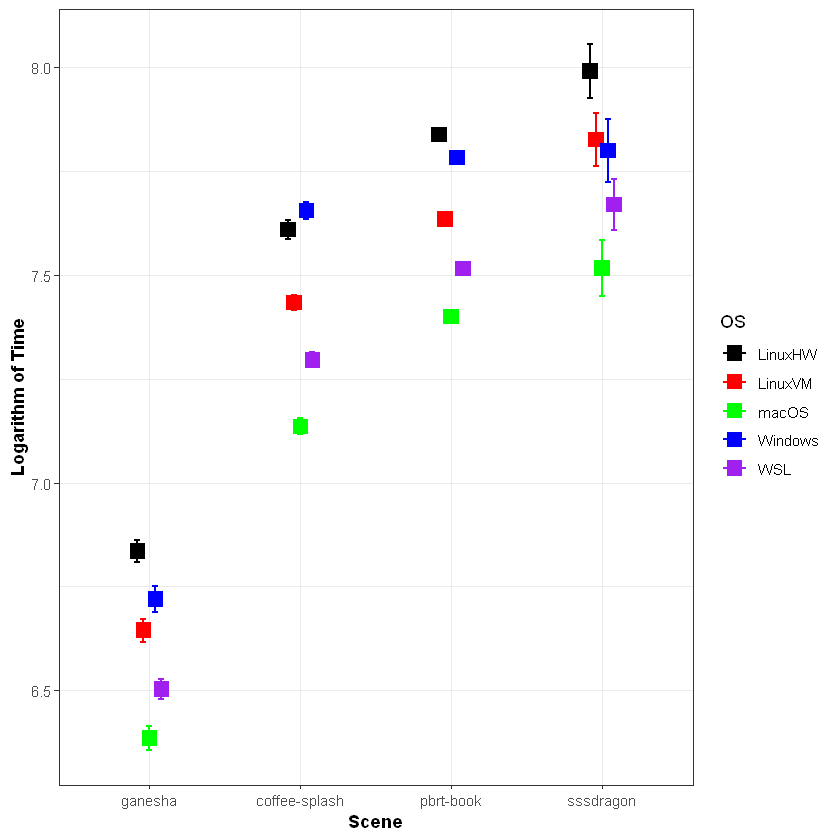

In [17]:
# Gráficos finales
library(FSA)
Sum = Summarize(T_log ~ Scene + OS, data=Data, digits = 3)
# Agregamos se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum
# Ordenar y graficar
Sum$Scene = factor(Sum$Scene, levels =
unique(Sum$Scene))
library(ggplot2)
pd= position_dodge(.2)
ggplot(Sum,
 aes(x=Scene,
 y=mean,
 color=OS)) +
 geom_errorbar(aes(ymin=mean - se,
 ymax=mean + se),
 width=0.2,
 size=0.7, position = pd) +
 geom_point(shape=15,
 size=4,
 position = pd) +
 theme_bw() +
 theme(axis.title = element_text(face="bold")) +
 scale_color_manual(values = c("black", "red", "green","blue","purple"))+
 ylab("Logarithm of Time")

Algorithm,OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bvh,macOS,20,7.018,0.445,6.272,6.866,7.197,7.346,7.391,0.0995
mitchell,macOS,20,7.028,0.455,6.272,6.877,7.209,7.360,7.418,0.1020
sinc,macOS,20,7.075,0.437,6.361,6.922,7.239,7.396,7.459,0.0977
kdtree,macOS,20,7.315,0.519,6.579,7.098,7.321,7.539,8.030,0.1160
bvh,WSL,20,7.167,0.451,6.424,7.024,7.367,7.503,7.518,0.1010
mitchell,WSL,20,7.168,0.452,6.415,7.040,7.374,7.497,7.527,0.1010
sinc,WSL,20,7.203,0.448,6.461,7.069,7.397,7.531,7.557,0.1000
kdtree,WSL,20,7.441,0.529,6.674,7.237,7.470,7.677,8.148,0.1180
bvh,LinuxVM,20,7.295,0.459,6.527,7.154,7.496,7.628,7.675,0.1030


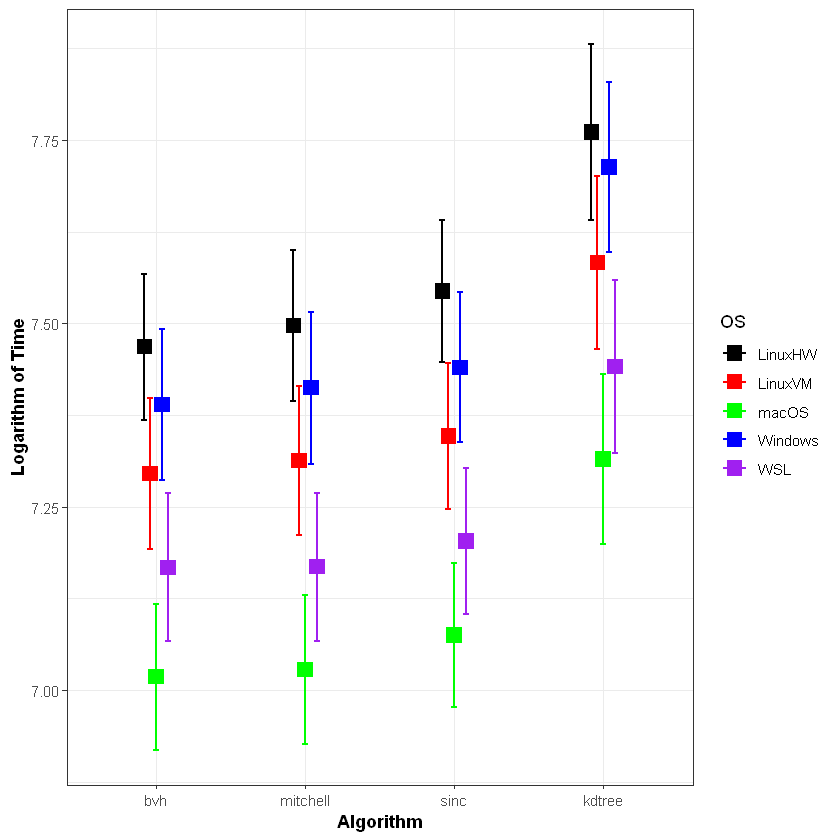

In [18]:
library(FSA)
Sum = Summarize(T_log ~ Algorithm + OS, data=Data, digits = 3)
# Agregamos se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum
# Ordenar y graficar
Sum$Algorithm = factor(Sum$Algorithm, levels =
unique(Sum$Algorithm))
library(ggplot2)
pd= position_dodge(.2)
ggplot(Sum,
 aes(x=Algorithm,
 y=mean,
 color=OS)) +
 geom_errorbar(aes(ymin=mean - se,
 ymax=mean + se),
 width=0.2,
 size=0.7, position = pd) +
 geom_point(shape=15,
 size=4,
 position = pd) +
 theme_bw() +
 theme(axis.title = element_text(face="bold")) +
 scale_color_manual(values = c("black", "red", "green","blue","purple"))+
 ylab("Logarithm of Time")

OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
macOS,80,7.109,0.472,6.272,6.941,7.302,7.384,8.030,0.0528
WSL,80,7.245,0.476,6.415,7.087,7.458,7.517,8.148,0.0532
LinuxVM,80,7.384,0.478,6.527,7.225,7.593,7.659,8.310,0.0534
Windows,80,7.488,0.486,6.606,7.422,7.620,7.758,8.456,0.0543
LinuxHW,80,7.567,0.476,6.713,7.333,7.780,7.831,8.558,0.0532


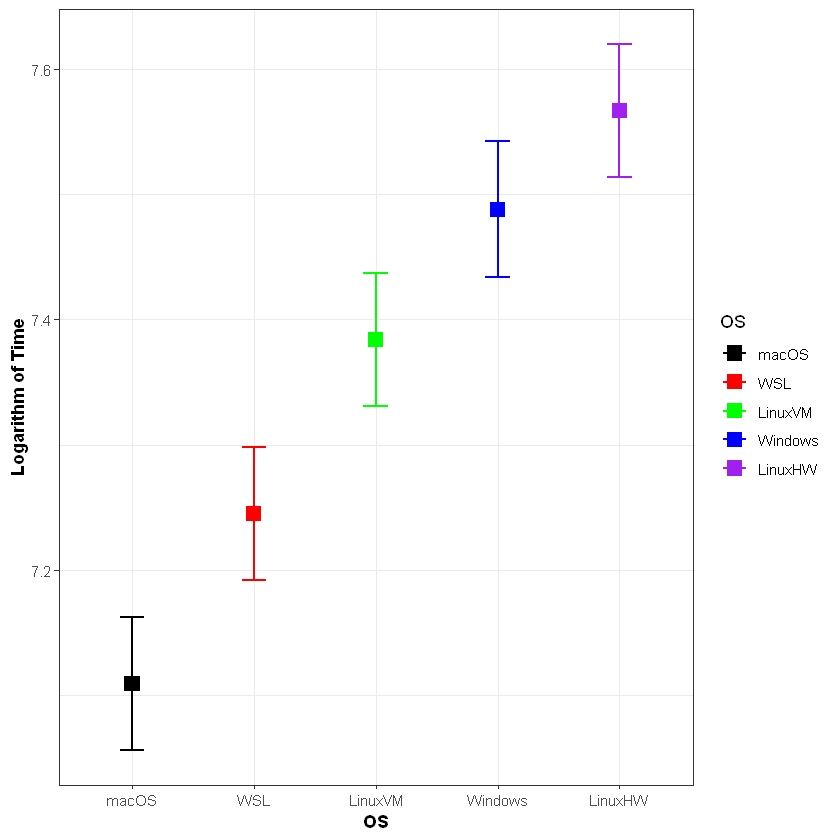

In [19]:
library(FSA)
Sum = Summarize(T_log ~ OS, data=Data, digits = 3)
# Agregamos se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum
# Ordenar y graficar
Sum$OS = factor(Sum$OS, levels =
unique(Sum$OS))
library(ggplot2)
pd= position_dodge(.2)
ggplot(Sum,
 aes(x=OS,
 y=mean,
 color=OS)) +
 geom_errorbar(aes(ymin=mean - se,
 ymax=mean + se),
 width=0.2,
 size=0.7, position = pd) +
 geom_point(shape=15,
 size=4,
 position = pd) +
 theme_bw() +
 theme(axis.title = element_text(face="bold")) +
 scale_color_manual(values = c("black", "red", "green","blue","purple"))+
 ylab("Logarithm of Time")

In [20]:
# Promedios des transformados:
library(FSA)
Sum = Summarize(T_log ~ OS, data=Data, digits = 3)
# Destransformar
Sum$mean = exp(Sum$mean)
Sum$sd = exp(Sum$sd)
# Agregamos se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum


OS,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
macOS,80,1222.924,1.603197,6.272,6.941,7.302,7.384,8.030,0.179
WSL,80,1401.082,1.609623,6.415,7.087,7.458,7.517,8.148,0.180
LinuxVM,80,1610.017,1.612845,6.527,7.225,7.593,7.659,8.310,0.180
Windows,80,1786.476,1.625800,6.606,7.422,7.620,7.758,8.456,0.182
LinuxHW,80,1933.332,1.609623,6.713,7.333,7.780,7.831,8.558,0.180


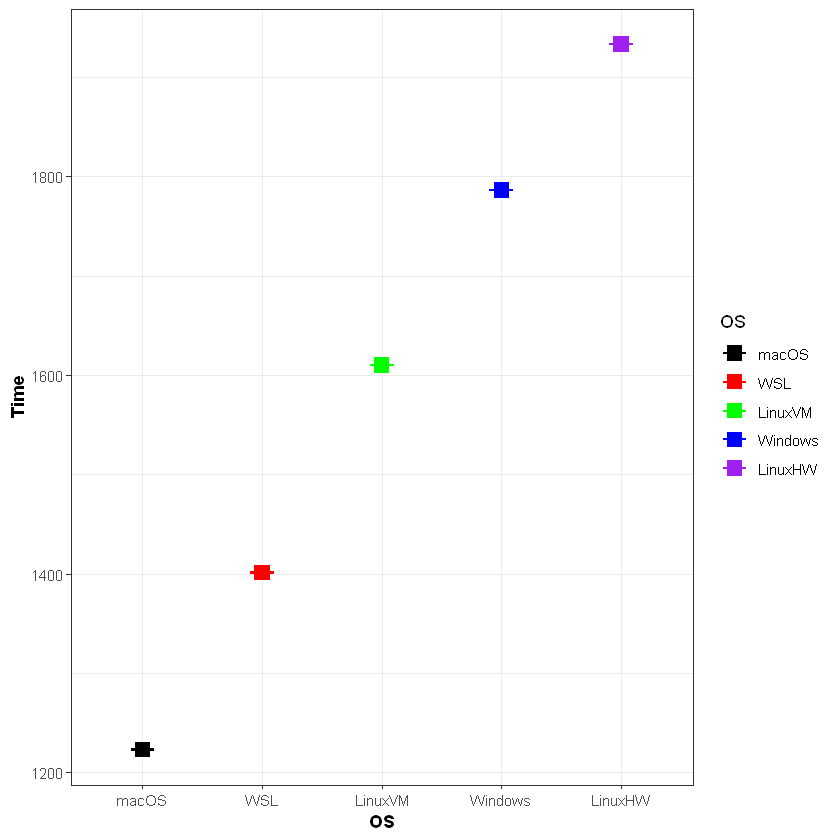

In [22]:
# Ordenar y graficar
Sum$OS = factor(Sum$OS, levels = unique(Sum$OS))

library(ggplot2)
pd= position_dodge(.2)
ggplot(Sum,
 aes(x=OS,
 y=mean,
 color=OS)) +
 geom_errorbar(aes(ymin=mean - se,
 ymax=mean + se),
 width=0.2,
 size=0.7, position = pd) +
 geom_point(shape=15,
 size=4,
 position = pd) +
 theme_bw() +
 theme(axis.title = element_text(face="bold")) +
 scale_color_manual(values = c("black", "red", "green","blue","purple"))+
 ylab("Time")